### Intragenic Exonic sense vs antinsense

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
current_dir=os.getcwd()

In [2]:
exonic_intragenic_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_exonCounts','hostgene_txStarts','hostgene_txEnds','mature_host_mRNA_Length',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [3]:
""" This command will get exonic miRNAs on the same strand as host genes. 
However,miRNAs partially overlapped with the exons will be included."""
##human_exonic_miR_intragenic_NCBI.tsv is generated from bedtools_nonexonic_miR.sh
Human_exonicmiR_intragenic=pd.read_csv(f"{current_dir}/Human_tsv_file/human_exonic_miR_intragenic_NCBI.tsv", sep="\t",
                                      header=None,names=exonic_intragenic_columns)

In [4]:
Human_exonicmiR_intragenic.shape

(2058, 19)

In [5]:
""" This command will get exonic miRNAs on the opposite strand as host genes. 
However,miRNAs partially overlapped with the exons will be included."""
##human_exonic_miR_intragenic_NCBI.tsv is generated from bedtools_nonexonic_miR.sh
Human_exonicmiR_antisense=pd.read_csv(f"{current_dir}/Human_tsv_file/human_exonic_miR_opposite_NCBI.tsv", sep="\t",
                                      header=None,names=exonic_intragenic_columns)

In [6]:
Human_exonicmiR_intragenic=Human_exonicmiR_intragenic.loc[Human_exonicmiR_intragenic['miR_type']=="miRNA_primary_transcript"]

In [7]:
Human_exonicmiR_intragenic=Human_exonicmiR_intragenic.drop_duplicates(subset=["miR_Name"])

In [8]:
Human_exonicmiR_intragenic["miR_Name"]=Human_exonicmiR_intragenic["miR_Name"].str.replace("Name=", "")

In [9]:
Human_exonicmiR_intragenic["host_gene_region"]="exons"

In [10]:
Human_exonicmiR_intragenic

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,Alias=MI0032314,exons
32,chr1,9148010,9151835,9182338,9182338,-,2,9148010,9182338,4157,MIR34AHG,NR_132742.1,chr1,9151668,9151777,miRNA_primary_transcript,hsa-mir-34a,-,Alias=MI0000268,exons
35,chr1,12166990,12167169,12167091,12207020,+,10,12166990,12209220,3687,TNFRSF1B,NM_001066.3,chr1,12166943,12167038,miRNA_primary_transcript,hsa-mir-7846,+,Alias=MI0025516,exons
43,chr1,33332274,33332404,33324864,33375539,-,16,33323625,33431095,4050,PHC2,NM_001385119.1,chr1,33332393,33332492,miRNA_primary_transcript,hsa-mir-3605,-,Alias=MI0015995,exons
50,chr1,98046007,98046396,98049693,98049693,-,5,97987999,98049693,2469,MIR137HG,NR_046105.1,chr1,98046070,98046171,miRNA_primary_transcript,hsa-mir-137,-,Alias=MI0000454,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,chr22,41922031,41925554,41925366,41926773,-,3,41922031,41926806,3923,TNFRSF13C,NM_052945.4,chr22,41923222,41923297,miRNA_primary_transcript,hsa-mir-378i,-,Alias=MI0016902,exons
1998,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,16367,LOC124905135,XM_047441696.1,chr22,46112749,46112822,miRNA_primary_transcript,hsa-let-7a-3,+,Alias=MI0000062,exons
2001,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,16367,LOC124905135,XM_047441696.1,chr22,46113566,46113657,miRNA_primary_transcript,hsa-mir-4763,+,Alias=MI0017404,exons
2004,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,16367,LOC124905135,XM_047441696.1,chr22,46113686,46113768,miRNA_primary_transcript,hsa-let-7b,+,Alias=MI0000063,exons


In [11]:
Human_exonicmiR_antisense=Human_exonicmiR_antisense.loc[Human_exonicmiR_antisense['miR_type']=="miRNA_primary_transcript"]

In [12]:
Human_exonicmiR_antisense=Human_exonicmiR_antisense.drop_duplicates(subset=["miR_Name"])

In [13]:
Human_exonicmiR_antisense["miR_Name"]=Human_exonicmiR_antisense["miR_Name"].str.replace("Name=", "")

In [14]:
Human_exonicmiR_antisense["host_gene_region"]="exons"

In [15]:
Human_exonicmiR_antisense.shape

(70, 20)

In [16]:
Human_exonicmiR_antisense

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,22863036,22863192,22710982,22913570,+,16,22710837,22921500,10943,EPHB2,XM_047449104.1,chr1,22863159,22863226,miRNA_primary_transcript,hsa-mir-4253,-,Alias=MI0015860,exons
14,chr1,43448102,43448644,43448644,43448644,-,2,43447775,43448644,699,SZT2-AS1,NR_046744.1,chr1,43448539,43448611,miRNA_primary_transcript,hsa-mir-6735,+,Alias=MI0022580,exons
17,chr1,116550384,116561187,116561187,116561187,+,3,116544700,116561187,11010,LOC105378925,XR_947739.2,chr1,116560024,116560111,miRNA_primary_transcript,hsa-mir-548ac,-,Alias=MI0016762,exons
19,chr1,172136878,172144835,172144835,172144835,-,1,172136878,172144835,7957,DNM3OS,NR_038397.2,chr1,172138808,172138888,miRNA_primary_transcript,hsa-mir-3120,+,Alias=MI0014136,exons
25,chr2,6650105,6650519,6650519,6650519,-,2,6649106,6650519,689,MIR7515HG,NR_110497.1,chr2,6650373,6650439,miRNA_primary_transcript,hsa-mir-7515,+,Alias=MI0024354,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,chr19,51692633,51693456,51693456,51693456,-,2,51685362,51693456,3962,SPACA6-AS1,NR_108100.1,chr19,51693254,51693339,miRNA_primary_transcript,hsa-mir-125a,+,Alias=MI0000469,exons
549,chr19,53787021,53787759,53788225,53788225,-,2,53787021,53788225,1077,LOC124904767,XR_007067336.1,chr19,53787675,53787741,miRNA_primary_transcript,hsa-mir-371a,+,Alias=MI0000779,exons
552,chr19,53787886,53788225,53788225,53788225,-,2,53787021,53788225,1077,LOC124904767,XR_007067336.1,chr19,53787890,53787956,miRNA_primary_transcript,hsa-mir-372,+,Alias=MI0000780,exons
555,chr20,62064450,62065458,61976167,62064694,-,16,61974797,62065863,4392,TAF4,XM_047440429.1,chr20,62064802,62064885,miRNA_primary_transcript,hsa-mir-3195,+,Alias=MI0014240,exons


In [17]:
Human_exonicmiR_intragenic=pd.concat([Human_exonicmiR_intragenic,Human_exonicmiR_antisense],axis=0)

In [18]:
#### This file has all miRNAs are only partially or fully overlapped with the exons of the hostgenes.
### Sense and antisense ones are included here.
Human_exonicmiR_intragenic.shape

(367, 20)

### Intronic_antisense

In [19]:
intronic_intragenic_columns=['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name','miR_strand', 'miR_ID']

In [20]:
len(intronic_intragenic_columns)

15

In [21]:
Human_intronicmiR_intragenic=pd.read_csv(f"{current_dir}/Human_tsv_file/human_intronic_miR_intragenic_NCBI.tsv", sep="\t",
                                      header=None,names=intronic_intragenic_columns)

In [22]:
Human_intronicmiR_antisense=pd.read_csv(f"{current_dir}/Human_tsv_file/human_intronic_opposite_miR_NCBI.tsv", sep="\t",
                                      header=None,names=intronic_intragenic_columns)

In [23]:
Human_intronicmiR_intragenic=Human_intronicmiR_intragenic.loc[Human_intronicmiR_intragenic['miR_type']=="miRNA_primary_transcript"]

In [24]:
Human_intronicmiR_intragenic=Human_intronicmiR_intragenic.drop_duplicates(subset=["miR_Name"])

In [25]:
Human_intronicmiR_intragenic.shape

(1157, 15)

In [26]:
Human_intronicmiR_intragenic["miR_Name"]=Human_intronicmiR_intragenic["miR_Name"].str.replace("Name=", "")

In [27]:
Human_intronicmiR_intragenic["host_gene_region"]= "introns"

In [28]:
Human_intronicmiR_antisense=Human_intronicmiR_antisense.loc[Human_intronicmiR_antisense['miR_type']=="miRNA_primary_transcript"]

In [29]:
Human_intronicmiR_antisense=Human_intronicmiR_antisense.drop_duplicates(subset=["miR_Name"])

In [30]:
Human_intronicmiR_antisense["miR_Name"]=Human_intronicmiR_antisense["miR_Name"].str.replace("Name=", "")

In [31]:
Human_intronicmiR_antisense["host_gene_region"]="introns"

In [32]:
Human_intronicmiR_antisense.shape

(253, 16)

In [33]:
Human_intronicmiR_intragenic=pd.concat([Human_intronicmiR_intragenic, Human_intronicmiR_antisense],axis=0)

### Merge exonic and intronic intragenic files and determine the transcriptional direction of miRNAs relative to the hostgenes

In [34]:
Human_exonicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'mature_host_mRNA_Length', 'hostgene_Name', 'hostgene_NCBI_ID',
       'miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'host_gene_region'],
      dtype='object')

In [35]:
Human_exonicmiR_intragenic=Human_exonicmiR_intragenic[['hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
      'miR_type', 'miR_Name', 'miR_ID','miR_strand','host_gene_region']]

In [36]:
Human_intronicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_Name', 'miR_strand', 'miR_ID',
       'host_gene_region'],
      dtype='object')

In [37]:
Human_intronicmiR_intragenic=Human_intronicmiR_intragenic[['hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
      'miR_type', 'miR_Name', 'miR_ID','miR_strand','host_gene_region']]

In [38]:
Human_intragenic_df=pd.concat([Human_exonicmiR_intragenic,Human_intronicmiR_intragenic], axis=0)

In [39]:
Human_intragenic_df.shape

(1777, 8)

In [40]:
Human_intronicmiR_intragenic.shape

(1410, 8)

In [41]:
Human_exonicmiR_intragenic.shape

(367, 8)

In [42]:
Human_intragenic_df=Human_intragenic_df.drop_duplicates(subset=["miR_Name"])

In [43]:
####Remove any duplicated intragenic miRNAs
Human_intragenic_df.shape

(1519, 8)

In [44]:
def transcription_direction(df,transcription_direction,hostgene_strand,miRNA_strand):
    """This function will assign transcription direction of miRNAs relative to their host genes"""
    df[transcription_direction] = df.apply(lambda row: "sense (+)" if row[hostgene_strand] == row[miRNA_strand] else "antisense (-)", axis=1)
    return df

In [45]:
transcription_direction(Human_intragenic_df,"transcription_direction_relative_to_the_host_gene",
                        "hostgene_strand","miR_strand")

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_type,miR_Name,miR_ID,miR_strand,host_gene_region,transcription_direction_relative_to_the_host_gene
0,XM_047427799.1,COP1,-,miRNA_primary_transcript,hsa-mir-1843,Alias=MI0032314,-,exons,sense (+)
32,NR_132742.1,MIR34AHG,-,miRNA_primary_transcript,hsa-mir-34a,Alias=MI0000268,-,exons,sense (+)
35,NM_001066.3,TNFRSF1B,+,miRNA_primary_transcript,hsa-mir-7846,Alias=MI0025516,+,exons,sense (+)
43,NM_001385119.1,PHC2,-,miRNA_primary_transcript,hsa-mir-3605,Alias=MI0015995,-,exons,sense (+)
50,NR_046105.1,MIR137HG,-,miRNA_primary_transcript,hsa-mir-137,Alias=MI0000454,-,exons,sense (+)
...,...,...,...,...,...,...,...,...,...
24840,NM_001135729.2,TOM1,+,miRNA_primary_transcript,hsa-mir-6069,Alias=MI0020346,-,introns,antisense (-)
24886,XM_047441138.1,ANKRD54,-,miRNA_primary_transcript,hsa-mir-659,Alias=MI0003683,-,introns,sense (+)
24901,NM_001282726.2,SLC25A17,-,miRNA_primary_transcript,hsa-mir-4766,Alias=MI0017407,-,introns,sense (+)
24952,XM_011530347.3,SREBF2,+,miRNA_primary_transcript,hsa-mir-33a,Alias=MI0000091,+,introns,sense (+)


### Plot the pie charts

In [46]:
hg_intramiR_loci=Human_intragenic_df.groupby(Human_intragenic_df["transcription_direction_relative_to_the_host_gene"]).size().reset_index(name='Count')

In [47]:
hg_intramiR_loci

,transcription_direction_relative_to_the_host_gene,Count
0,antisense (-),284
1,sense (+),1235


In [48]:
hg_intramiR_sense=hg_intramiR_loci[hg_intramiR_loci["transcription_direction_relative_to_the_host_gene"]=='sense (+)'].sum()
hg_intramiR_antisense=hg_intramiR_loci[hg_intramiR_loci["transcription_direction_relative_to_the_host_gene"]=='antisense (-)'].sum()

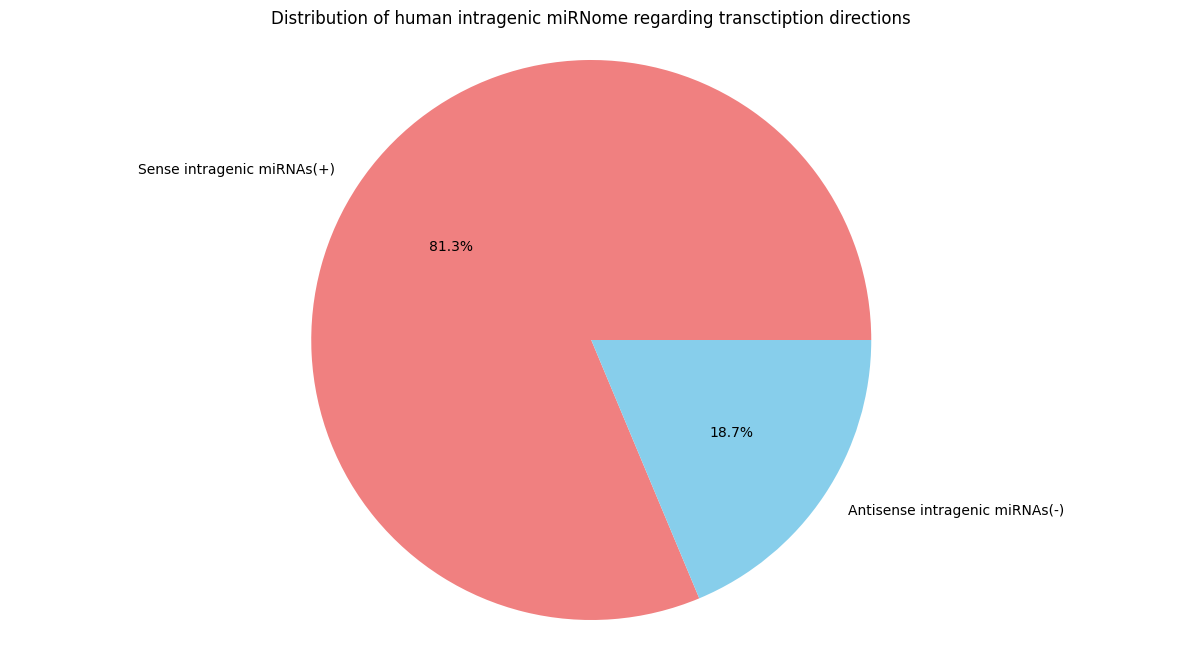

In [50]:
#Human miR loci distribution pie Chart
labels = ['Sense intragenic miRNAs(+)', 'Antisense intragenic miRNAs(-)']
sizes = [hg_intramiR_sense['Count'], hg_intramiR_antisense['Count']]
colors = ['lightcoral','skyblue']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human intragenic miRNome regarding transctiption directions')
plt.savefig(f'{current_dir}/Pie_charts/Distribution of human intragenic miRNome.eps')
plt.show()